In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model, load_model,Sequential
from keras.layers import Input, Dense,Embedding,Reshape,concatenate,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [2]:
data = pd.read_csv('claims_fraud_data_cleaned.csv',encoding ='UTF-8')

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,2,3,5,6,9,12,13,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.dropna(inplace=True)
data.drop(columns='DriverRating.1',inplace=True)

In [4]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Fraud_Found_Binary', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days:Policy-Accident(Numerical)',
       'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled(Numerical)', 'WitnessPresent',
       'AgentType', 'NumberOfSuppliments', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
data.head(15)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled(Numerical),WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,Year,BasePolicy
0,Dec,5.0,Wednesday,Honda,1.0,Tuesday,Jan,1.0,0.0,Single,...,0.0,3.0,28.0,0.0,0.0,0.0,0.0,3.5,1994.0,Liability
1,Jan,3.0,Wednesday,Honda,1.0,Monday,Jan,4.0,1.0,Single,...,0.0,6.0,33.0,1.0,0.0,0.0,0.0,1.0,1994.0,Collision
2,Oct,5.0,Friday,Honda,1.0,Thursday,Nov,2.0,1.0,Married,...,1.0,7.0,45.0,0.0,0.0,0.0,0.0,1.0,1994.0,Collision
3,Jun,2.0,Saturday,Toyota,0.0,Friday,Jul,1.0,1.0,Married,...,1.0,8.0,57.0,1.0,0.0,0.0,6.0,1.0,1994.0,Liability
4,Jan,5.0,Monday,Honda,1.0,Tuesday,Feb,2.0,0.0,Single,...,0.0,5.0,33.0,0.0,0.0,0.0,0.0,1.0,1994.0,Collision
5,Oct,4.0,Friday,Honda,1.0,Wednesday,Nov,1.0,1.0,Single,...,0.0,5.0,23.0,0.0,0.0,0.0,3.0,1.0,1994.0,Collision
6,Feb,1.0,Saturday,Honda,1.0,Monday,Feb,3.0,1.0,Married,...,1.0,7.0,38.0,0.0,0.0,0.0,1.0,1.0,1994.0,Collision
7,Nov,1.0,Friday,Honda,1.0,Tuesday,Mar,4.0,1.0,Single,...,1.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,1994.0,Collision
8,Dec,4.0,Saturday,Honda,1.0,Wednesday,Dec,5.0,1.0,Single,...,0.0,6.0,33.0,0.0,1.0,0.0,3.0,1.0,1994.0,Collision
9,Apr,3.0,Tuesday,Ford,1.0,Wednesday,Apr,3.0,1.0,Married,...,3.0,8.0,38.0,0.0,0.0,0.0,3.0,1.0,1994.0,All Perils


In [6]:
LABELS = data['Fraud_Found_Binary']
data.drop(columns=['Fraud_Found_Binary'],inplace=True)

In [7]:
ohe_columns=['Month','WeekOfMonth','DayOfWeek','Make','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed',
             'MaritalStatus','PolicyType', 'VehicleCategory','BasePolicy']
binary_columns=['AccidentArea','Sex','Fault','PoliceReportFiled(Numerical)','WitnessPresent','AgentType']

In [8]:
num_data=data.drop(ohe_columns+binary_columns,1)

scaler=StandardScaler()
num_data_norm=scaler.fit_transform(num_data)
num_data_norm = np.hstack([num_data_norm,data[binary_columns]])
num_data_norm.shape

#add back binary to num_data
num_data=data.drop(ohe_columns,1)

In [9]:
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_data = enc.fit_transform(data[ohe_columns])
ohe_data.shape

(15420, 88)

In [10]:
#final_data = np.hstack([num_data_norm,ohe_data])
final_data = num_data_norm

In [11]:
final_data.shape

(15420, 20)

In [12]:
X_train, X_test, y_train, y_test = train_test_split( final_data, LABELS, test_size=0.25, random_state=42)

In [13]:
X_train = X_train[y_train==0]

In [14]:
X_train.shape

(10882, 20)

In [15]:
# input_dim = X_train.shape[1]
# encoding_dim = 50
# input_layer = Input(shape=(input_dim, ))
# encoder = Dense(encoding_dim, activation="tanh", 
#                 activity_regularizer=regularizers.l1(10e-5))(input_layer)
# encoder = Dense(int(encoding_dim / 4), activation="relu")(encoder)
# decoder = Dense(int(encoding_dim / 4), activation='tanh')(encoder)
# decoder = Dense(input_dim, activation='relu')(decoder)
# autoencoder = Model(inputs=input_layer, outputs=decoder)
# autoencoder.summary()
input_dim = X_train.shape[1]
encoding_dim = 18
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(10, activation="relu")(encoder)
decoder = Dense(10, activation='tanh')(encoder)
decoder = Dense(18, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                378       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                190       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 18)                198       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                380       
Total params: 1,256
Trainable params: 1,256
Non-trainable params: 0
_________________________________________________________

In [16]:
nb_epoch = 100
batch_size = 256
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history

Train on 10882 samples, validate on 3855 samples
Epoch 1/100
10882/10882 [==============================] - 1s 54us/step - loss: 0.9942 - val_loss: 0.9273
Epoch 2/100
10882/10882 [==============================] - 0s 15us/step - loss: 0.8720 - val_loss: 0.8152
Epoch 3/100
10882/10882 [==============================] - 0s 18us/step - loss: 0.7798 - val_loss: 0.7420
Epoch 4/100
10882/10882 [==============================] - 0s 17us/step - loss: 0.7119 - val_loss: 0.6805
Epoch 5/100
10882/10882 [==============================] - 0s 17us/step - loss: 0.6547 - val_loss: 0.6298
Epoch 6/100
10882/10882 [==============================] - 0s 17us/step - loss: 0.6078 - val_loss: 0.5881
Epoch 7/100
10882/10882 [==============================] - 0s 17us/step - loss: 0.5714 - val_loss: 0.5580
Epoch 8/100
10882/10882 [==============================] - 0s 17us/step - loss: 0.5442 - val_loss: 0.5342
Epoch 9/100
10882/10882 [==============================] - 0s 16us/step - loss: 0.5228 - val_loss: 0.51

10882/10882 [==============================] - 0s 8us/step - loss: 0.3705 - val_loss: 0.3733
Epoch 78/100
10882/10882 [==============================] - 0s 9us/step - loss: 0.3704 - val_loss: 0.3730
Epoch 79/100
10882/10882 [==============================] - 0s 16us/step - loss: 0.3705 - val_loss: 0.3729
Epoch 80/100
10882/10882 [==============================] - 0s 13us/step - loss: 0.3701 - val_loss: 0.3724
Epoch 81/100
10882/10882 [==============================] - 0s 16us/step - loss: 0.3698 - val_loss: 0.3725
Epoch 82/100
10882/10882 [==============================] - 0s 14us/step - loss: 0.3697 - val_loss: 0.3724
Epoch 83/100
10882/10882 [==============================] - 0s 12us/step - loss: 0.3693 - val_loss: 0.3720
Epoch 84/100
10882/10882 [==============================] - 0s 15us/step - loss: 0.3693 - val_loss: 0.3720
Epoch 85/100
10882/10882 [==============================] - 0s 14us/step - loss: 0.3689 - val_loss: 0.3715
Epoch 86/100
10882/10882 [==========================

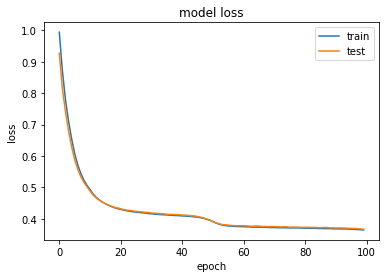

In [17]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [18]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,3855.000000,3855.000000
mean,0.359316,0.062257
std,1.609194,0.241653
min,0.008471,0.000000
25%,0.133345,0.000000
50%,0.206472,0.000000
75%,0.299524,0.000000
max,49.610674,1.000000


Text(0.5, 1.0, 'Reconstrucntion Error for Non-fraud')

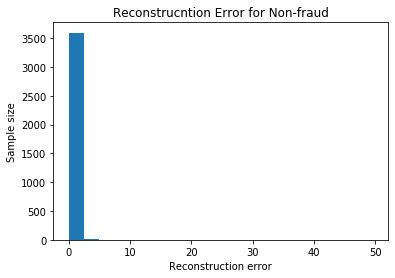

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
# normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 1)]
normal_error_df = error_df[(error_df['true_class']== 0)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=20)
plt.xlabel('Reconstruction error')
plt.ylabel('Sample size')
plt.title('Reconstrucntion Error for Non-fraud')

Text(0.5, 1.0, 'Reconstrucntion Error for Fraud')

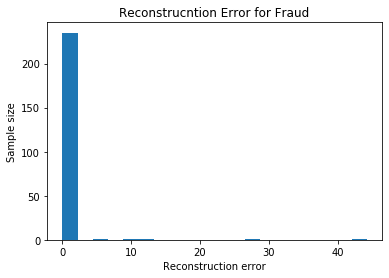

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=20)
plt.xlabel('Reconstruction error')
plt.ylabel('Sample size')
plt.title('Reconstrucntion Error for Fraud')

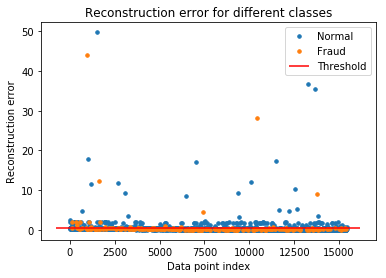

In [91]:
threshold = 0.5
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


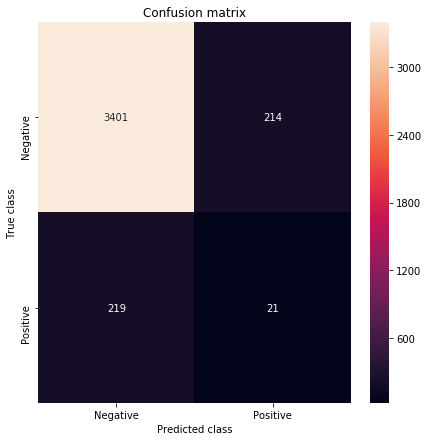

In [92]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(7, 7))
Label_name=['Negative','Positive']
sns.heatmap(conf_matrix, xticklabels=Label_name, yticklabels=Label_name, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Embedding

In [23]:
class EmbeddingMapping():
    """
    Helper class for handling categorical variables

    An instance of this class should be defined for each categorical variable we want to use.
    """

    def __init__(self, series):
        # get a list of unique values
        values = series.unique().tolist()

        # Set a dictionary mapping from values to integer value
        # In our example this will be {'Mercaz': 1, 'Old North': 2, 'Florentine': 3}
        self.embedding_dict = {value: int_value + 1 for int_value, value in enumerate(values)}

        # The num_values will be used as the input_dim when defining the embedding layer. 
        # It will also be returned for unseen values 
        self.num_values = len(values) + 1

    def get_mapping(self, value):
        # If the value was seen in the training set, return its integer mapping
        if value in self.embedding_dict:
            return self.embedding_dict[value]

        # Else, return the same integer for unseen values
        else:
            return self.num_values

In [24]:
embedding_inputs = []
col_embedddings = []
categorical_cols = []

for i,col in enumerate(ohe_columns):
    col_mapping = EmbeddingMapping(data[col])
    categorical_cols.append(data[col].apply(col_mapping.get_mapping))

    
    embeddings_output = int(col_mapping.num_values/2)
    col_input = Input(shape=(1,), dtype='float32') 
    embedding_inputs.append(col_input)
    
    col_embeding = Embedding(output_dim=embeddings_output, input_dim=col_mapping.num_values, input_length=1)(col_input)
    col_embeding = Reshape((embeddings_output,))(col_embeding)
    col_embedddings.append(col_embeding)

numerical_inputs = []
for i,col in enumerate(num_data.columns):
     numerical_inputs.append(Input(shape=(1, )))



In [48]:
all_input = concatenate(numerical_inputs+col_embedddings)
encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(all_input)
encoder = Dense(int(encoding_dim / 4), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 4), activation='relu')(decoder)
decoder = Dense(31, activation='relu')(decoder)
autoencoder_embedding = Model(inputs=numerical_inputs+embedding_inputs, outputs=decoder)
autoencoder_embedding.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_6 (I

In [49]:
numerical_cols = []
for col in num_data_norm.T:
    numerical_cols.append(col)
total_cols = numerical_cols+categorical_cols
model_data=np.array(total_cols).T
model_data.shape
X_train, X_test, y_train, y_test = train_test_split(model_data,LABELS, test_size=0.25, random_state=42) 
X_train = X_train[y_train==0]

In [50]:
X_train_list = list(X_train.T)
X_test_list = list(X_test.T)

In [51]:
nb_epoch = 200
batch_size = 512
autoencoder_embedding.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
history_embedding = autoencoder_embedding.fit(X_train_list, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_train_list,X_train),
                    verbose=1).history

Train on 10882 samples, validate on 10882 samples
Epoch 1/200
10882/10882 [==============================] - 1s 133us/step - loss: 5.5163 - acc: 0.0244 - val_loss: 4.4290 - val_acc: 0.0948
Epoch 2/200
10882/10882 [==============================] - 0s 16us/step - loss: 3.6922 - acc: 0.5362 - val_loss: 3.0751 - val_acc: 0.5924
Epoch 3/200
10882/10882 [==============================] - 0s 17us/step - loss: 2.9444 - acc: 0.6227 - val_loss: 2.8564 - val_acc: 0.5856
Epoch 4/200
10882/10882 [==============================] - 0s 17us/step - loss: 2.8015 - acc: 0.6215 - val_loss: 2.7386 - val_acc: 0.6872
Epoch 5/200
10882/10882 [==============================] - 0s 18us/step - loss: 2.6699 - acc: 0.6810 - val_loss: 2.3774 - val_acc: 0.5664
Epoch 6/200
10882/10882 [==============================] - 0s 16us/step - loss: 2.0946 - acc: 0.6786 - val_loss: 1.9912 - val_acc: 0.7172
Epoch 7/200
10882/10882 [==============================] - 0s 18us/step - loss: 1.9650 - acc: 0.7258 - val_loss: 1.9370 -

Epoch 118/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7475 - acc: 0.7908 - val_loss: 1.7479 - val_acc: 0.7991
Epoch 119/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7459 - acc: 0.7915 - val_loss: 1.7461 - val_acc: 0.7961
Epoch 120/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7445 - acc: 0.7962 - val_loss: 1.7461 - val_acc: 0.7468
Epoch 121/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7451 - acc: 0.7938 - val_loss: 1.7470 - val_acc: 0.8191
Epoch 122/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7453 - acc: 0.7958 - val_loss: 1.7440 - val_acc: 0.7954
Epoch 123/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7441 - acc: 0.7951 - val_loss: 1.7433 - val_acc: 0.8211
Epoch 124/200
10882/10882 [==============================] - 0s 15us/step - loss: 1.7444 - acc: 0.7957 - val_loss: 1.7439 - val_acc: 0.7655
Epoch 125/200
10882/

In [29]:
num_data_norm.shape

(15420, 20)

In [52]:
predictions = autoencoder_embedding.predict(X_test_list)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,3855.000000,3855.000000
mean,1.723329,0.062257
std,1.510903,0.241653
min,0.232628,0.000000
25%,1.008889,0.000000
50%,1.504092,0.000000
75%,1.980480,0.000000
max,36.619065,1.000000


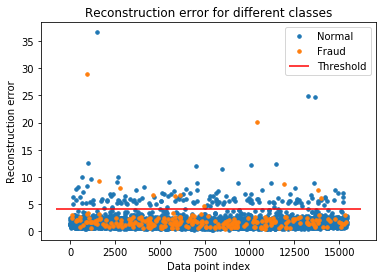

In [53]:
threshold = 4
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


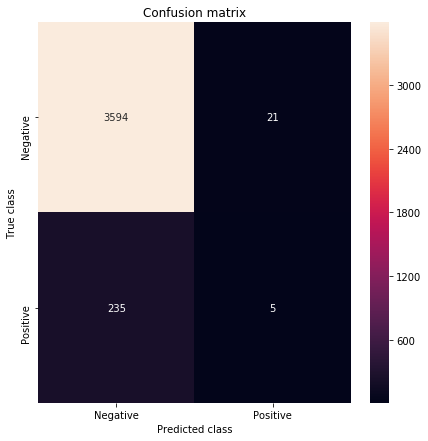

In [47]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(7, 7))
Label_name=['Negative','Positive']
sns.heatmap(conf_matrix, xticklabels=Label_name, yticklabels=Label_name, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()